In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import glob
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

/Users/mdurbin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [82]:
fitsfiles = glob.glob('/Users/mdurbin/old_omegacen/omegacen2/Map2/e?/omegaCen_2__e?_3p6um.fits')
fitsfiles.extend(glob.glob('/Users/mdurbin/old_omegacen/omegacen2/Map2/e??/omegaCen_2__e??_3p6um.fits'))
date_obs = []
from datetime import datetime, timedelta
for i in fitsfiles:
    date = fits.getval(i, 'DATE_OBS')
    dt = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f")
    date_obs.append(dt)
date_obs = np.array(date_obs)
date_obs -= date_obs[0]
date_obs = np.array(map(lambda td:td.total_seconds(), date_obs))

In [107]:
names = ['id','x','y']
nums = map(str, range(14))
for i in nums:
    names += ['mag' + i, 'merr' + i]
df_3p6 = pd.read_csv('final_data_files/omegaCen_2_3p6um_rrl.raw', delim_whitespace=True, names=names)
df_4p5 = pd.read_csv('final_data_files/omegaCen_2_4p5um_rrl.raw', delim_whitespace=True, names=names)
df2 = pd.read_csv('final_data_files/kaluzny_2004_rrl_reformat',delim_whitespace=True,
                  usecols=[0,3,6],names=['id','per','type'])
df2['id'] = map(lambda d: int(d.split('V')[-1]), df2['id'])
df2['per'] *= 24 * 3600

In [114]:
ids = [i for i in df_3p6['id'] if i in df_4p5['id']]
print ids

[15, 12, 11, 4, 5, 9, 10, 3, 13]


fuck 15
fuck 11


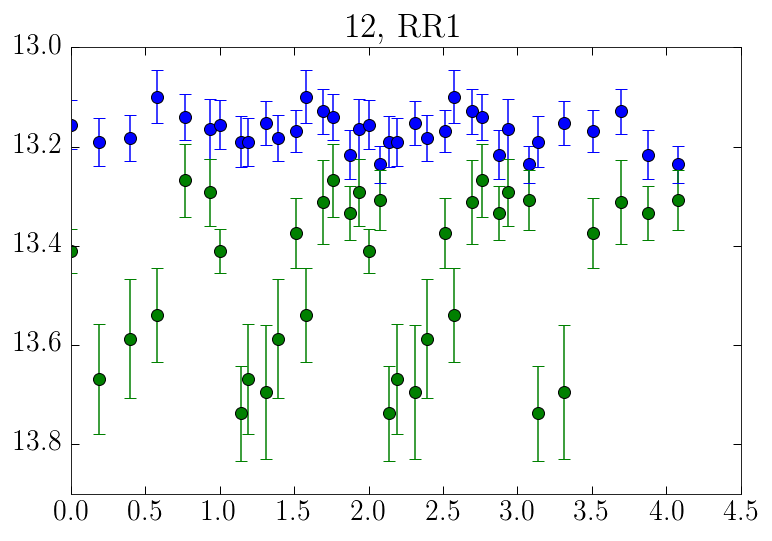

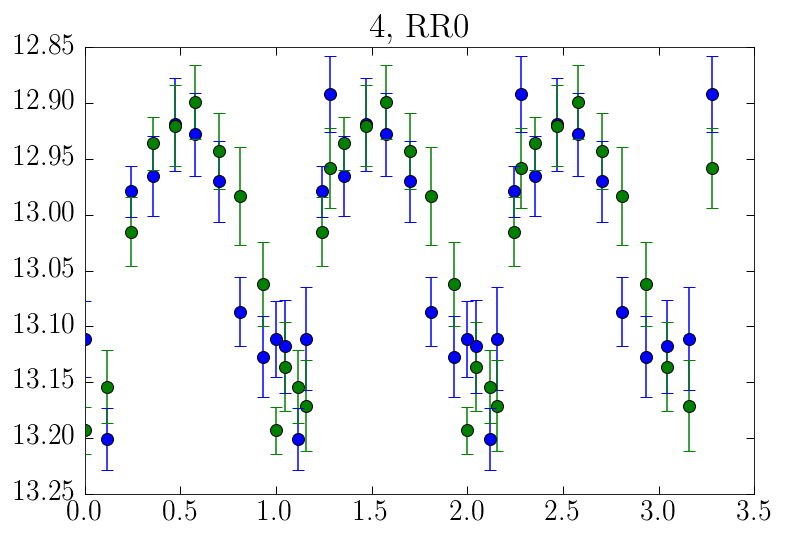

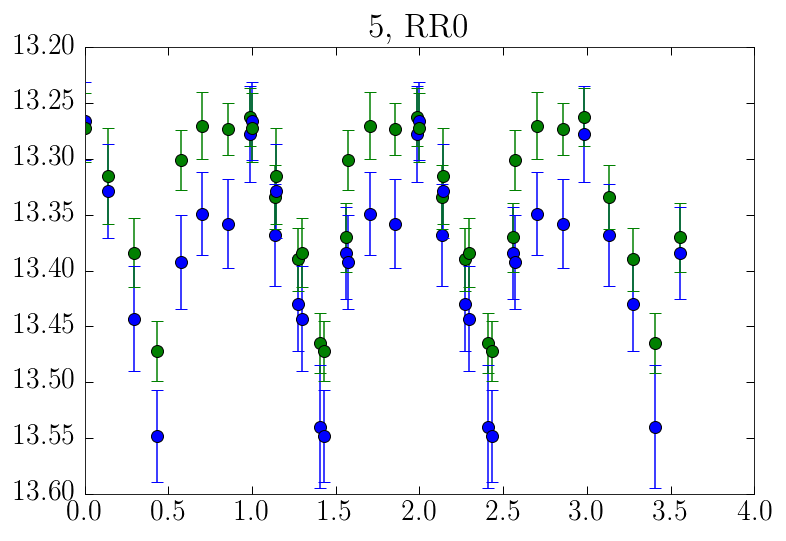

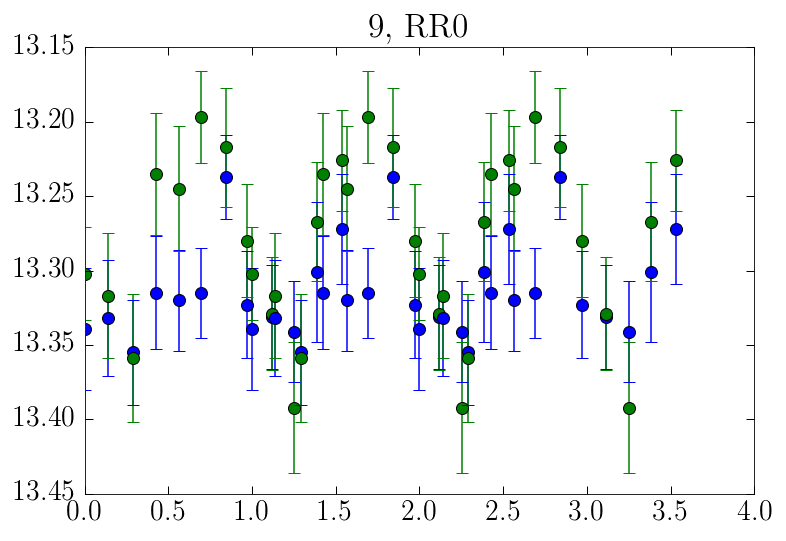

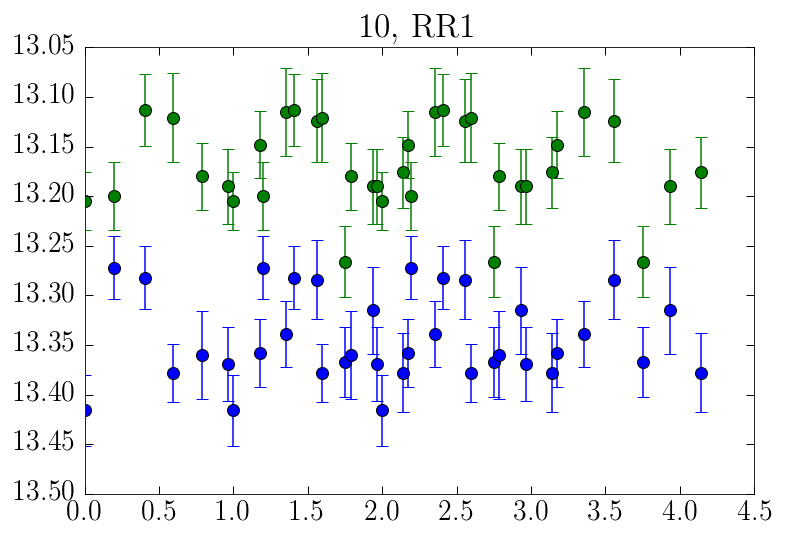

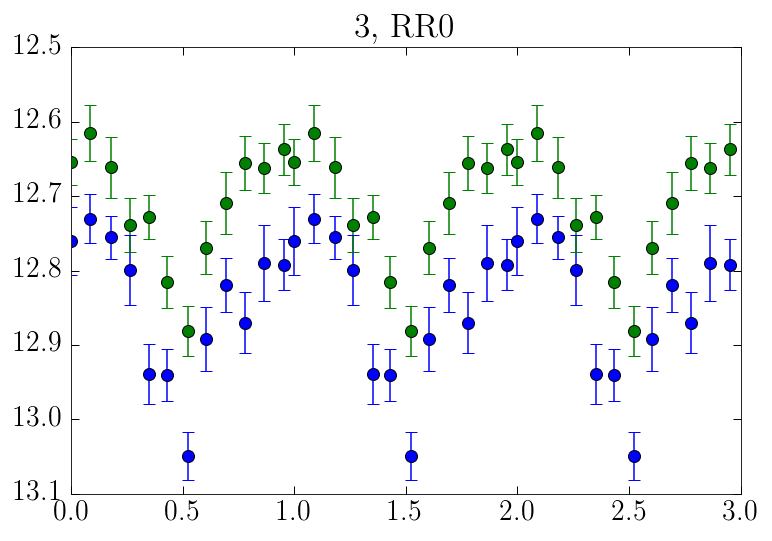

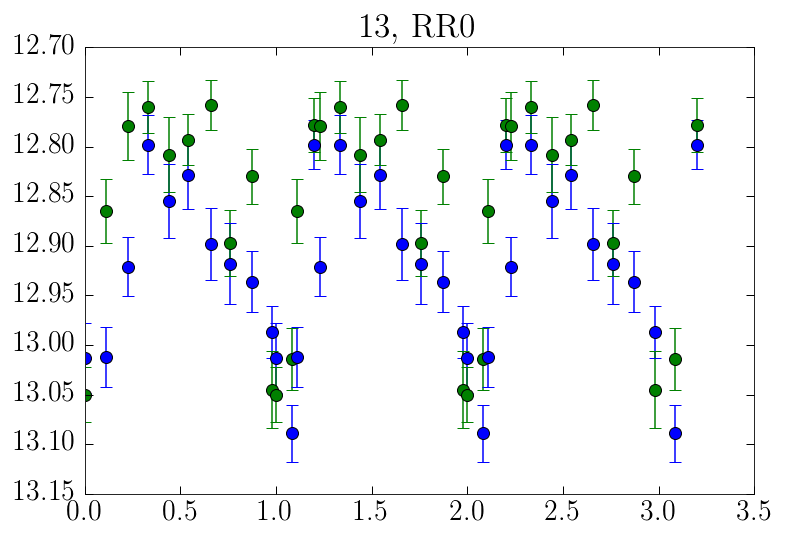

In [124]:
def phase_light_curve(rrid):
    df2_cut = df2[df2.id == rrid]
    df3 = df_3p6[df_3p6.id == rrid]
    df4 = df_4p5[df_4p5.id == rrid]
    per = df2_cut['per'].values[0]
    dates = date_obs / per
    mags3 = [df3['mag{}'.format(i)].values[0] for i in range(1,13)]
    mags4 = [df4['mag{}'.format(i)].values[0] for i in range(1,13)]
    merr3 = [df3['merr{}'.format(i)].values[0] for i in range(1,13)]
    merr4 = [df4['merr{}'.format(i)].values[0] for i in range(1,13)]
    fig, ax = plt.subplots(1,1)
    ppl.errorbar(dates, mags3, yerr=merr3, fmt='o', color='b')
    ppl.errorbar(dates, mags4, yerr=merr4, fmt='o', color='g')
    ppl.errorbar(dates+1, mags3, yerr=merr3, fmt='o', color='b')
    ppl.errorbar(dates+1, mags4, yerr=merr4, fmt='o', color='g')
    ppl.errorbar(dates+2, mags3, yerr=merr3, fmt='o', color='b')
    ppl.errorbar(dates+2, mags4, yerr=merr4, fmt='o', color='g')
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_title('{}, {}'.format(rrid, df2_cut['type'].values[0]))
    
for i in ids:
    try:
        phase_light_curve(i)
    except:
        print 'fuck', i